# Visualizing Data With Matplotlib

## Regular Data 

In [186]:
import matplotlib.pyplot as plt

In [187]:
months = ["jan", "feb", "mar", "april", "may", "jun", "july"]
sale = [20,30,20,50,90,60,90]
loss = [5,10,2,30,12,19,63]

In [188]:
import pandas as pd 
df = pd.DataFrame({"months":months, "sale":sale, "loss":loss})
df

,months,sale,loss
0,jan,20,5
1,feb,30,10
2,mar,20,2
3,april,50,30
4,may,90,12
5,jun,60,19
6,july,90,63


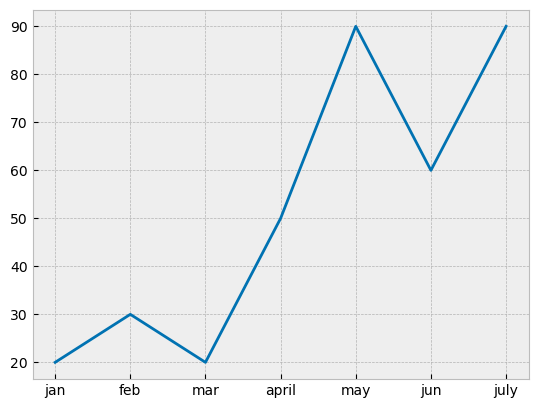

In [189]:
fig, ax = plt.subplots()
#plot takes first x-axis then y-axis
ax.plot(df["months"], df["sale"])
plt.show()

In [190]:
#plot takes first x-axis then y-axis


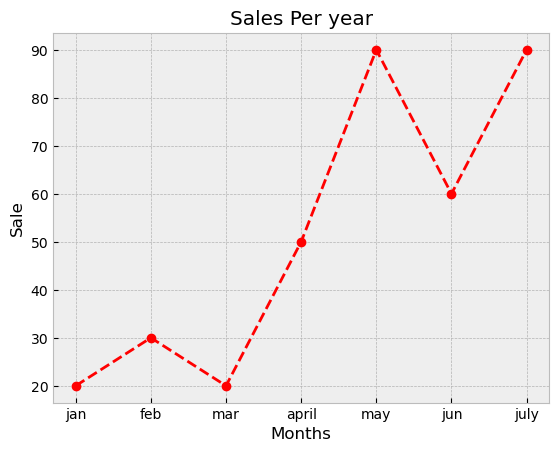

In [191]:
#for showing non-continuity ->markers 
#many marker styles can be found in docs
#line styles  can be found in docs
#set linestyle to "None" makes the graph has only points
fig, ax = plt.subplots()
ax.plot(df["months"], df["sale"], marker="o", linestyle="--", color="r")
ax.set_xlabel("Months")
ax.set_ylabel("Sale")
ax.set_title("Sales Per year")
plt.show()

In [192]:
# make many graphs in the same figure 
#small multiple plots
#provide rows and cols to the subplots


In [193]:
# ax now is an array of subplots we have to index through it

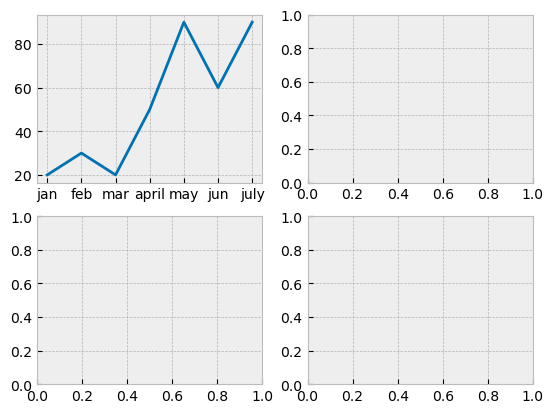

In [194]:
fig, ax = plt.subplots(2,2)
ax[0][0].plot(df["months"], df["sale"])

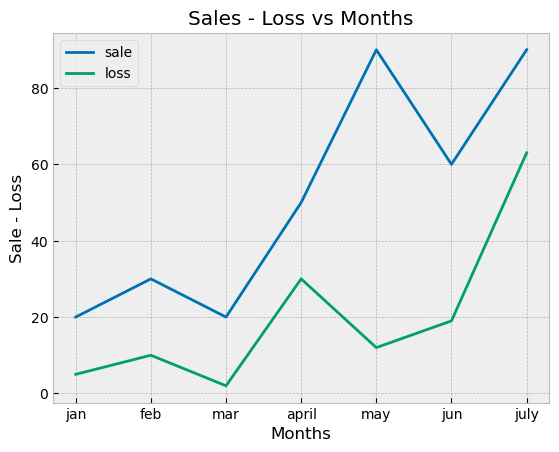

In [195]:
#using legends
#we need to specify label to each plot
fig, ax = plt.subplots()
ax.plot(df["months"], df["sale"], label="sale")
ax.plot(df["months"], df["loss"], label="loss")
plt.xlabel("Months")
plt.ylabel("Sale - Loss")
plt.title("Sales - Loss vs Months")
plt.legend()
plt.show()

## Plotting time-series data

In [196]:
df = pd.read_csv("https://assets.datacamp.com/production/repositories/3634/datasets/411add3f8570d5adf891127fd64095020210711b/climate_change.csv")

In [197]:
df

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06
...,...,...,...
701,2016-08-06,402.27,0.98
702,2016-09-06,401.05,0.87
703,2016-10-06,401.59,0.89
704,2016-11-06,403.55,0.93


In [198]:
df["date"]

0      1958-03-06
1      1958-04-06
2      1958-05-06
3      1958-06-06
4      1958-07-06
          ...    
701    2016-08-06
702    2016-09-06
703    2016-10-06
704    2016-11-06
705    2016-12-06
Name: date, Length: 706, dtype: object

In [199]:
df = df.set_index(df["date"])

In [200]:
df

,date,co2,relative_temp
date,,,
1958-03-06,1958-03-06,315.71,0.10
1958-04-06,1958-04-06,317.45,0.01
1958-05-06,1958-05-06,317.50,0.08
1958-06-06,1958-06-06,NaN,-0.05
1958-07-06,1958-07-06,315.86,0.06
...,...,...,...
2016-08-06,2016-08-06,402.27,0.98
2016-09-06,2016-09-06,401.05,0.87
2016-10-06,2016-10-06,401.59,0.89


In [201]:
df.index

Index(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06', '1958-07-06',
       '1958-08-06', '1958-09-06', '1958-10-06', '1958-11-06', '1958-12-06',
       ...
       '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06', '2016-07-06',
       '2016-08-06', '2016-09-06', '2016-10-06', '2016-11-06', '2016-12-06'],
      dtype='object', name='date', length=706)

In [202]:
df = df.set_index(pd.to_datetime(df.index))

In [203]:
df

,date,co2,relative_temp
date,,,
1958-03-06,1958-03-06,315.71,0.10
1958-04-06,1958-04-06,317.45,0.01
1958-05-06,1958-05-06,317.50,0.08
1958-06-06,1958-06-06,NaN,-0.05
1958-07-06,1958-07-06,315.86,0.06
...,...,...,...
2016-08-06,2016-08-06,402.27,0.98
2016-09-06,2016-09-06,401.05,0.87
2016-10-06,2016-10-06,401.59,0.89


In [204]:
df.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06',
               '2016-07-06', '2016-08-06', '2016-09-06', '2016-10-06',
               '2016-11-06', '2016-12-06'],
              dtype='datetime64[ns]', name='date', length=706, freq=None)

In [205]:
#another way to make the index of a dataframe datetime from the beginning 
#is using pd.read_csv() passing arguments below
#pd.read_csv("climate_change.csv", parse_dates=["date"], index_col="date")

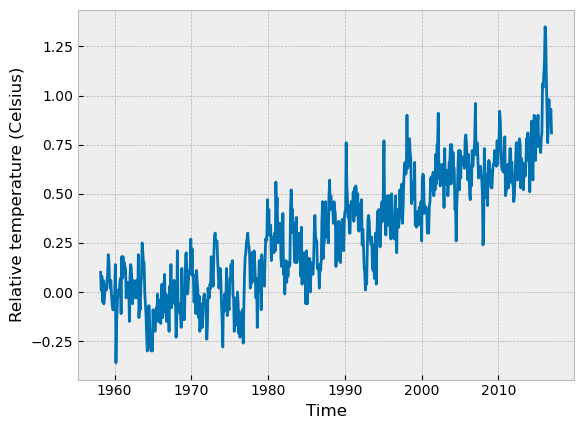

In [206]:
#now plotting this time series data 
fig, ax = plt.subplots()
ax.plot(df.index, df["relative_temp"])
ax.set_xlabel("Time")
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()

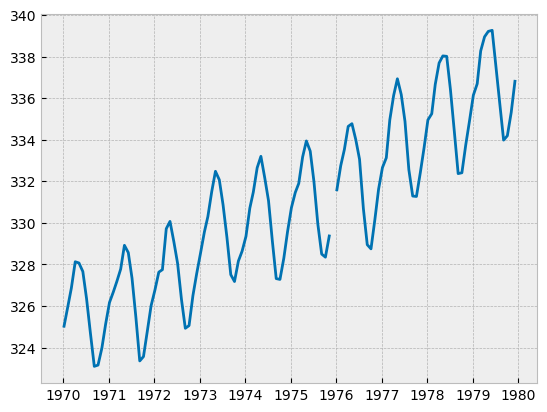

In [207]:
#Using a time index to zoom in
fig, ax = plt.subplots()
# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = df["1970-01-01":"1979-12-31"]
# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])
plt.show()

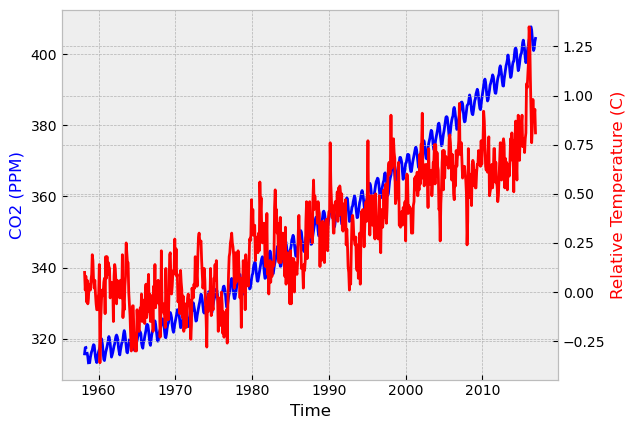

In [208]:
#using twin axes
#twin axes means having same x-axis and 2 y-axis
fig, ax = plt.subplots()
ax.plot(df.index,df["co2"], color="blue")
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (PPM)", color="blue")
ax2 = ax.twinx()
ax2.plot(df.index,df["relative_temp"], color="red")
ax2.set_ylabel("Relative Temperature (C)", color="red")
plt.show()

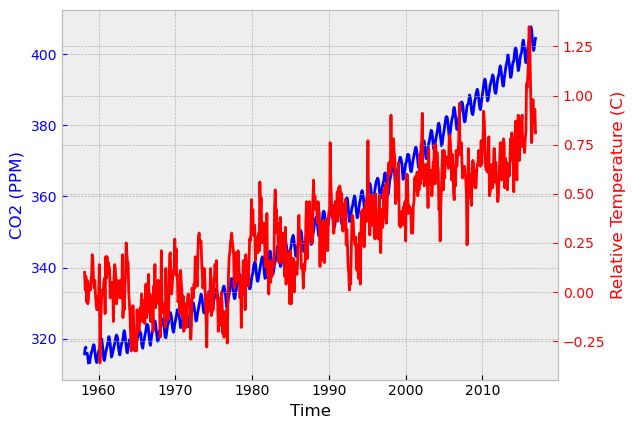

In [209]:
#using twin axes
#twin axes means having same x-axis and 2 y-axis
#using colored ticks
fig, ax = plt.subplots()
ax.plot(df.index,df["co2"], color="blue")
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (PPM)", color="blue")
ax.tick_params("y", colors="blue")
ax2 = ax.twinx()
ax2.plot(df.index,df["relative_temp"], color="red")
ax2.set_ylabel("Relative Temperature (C)", color="red")
ax2.tick_params("y", colors="red")
plt.show()

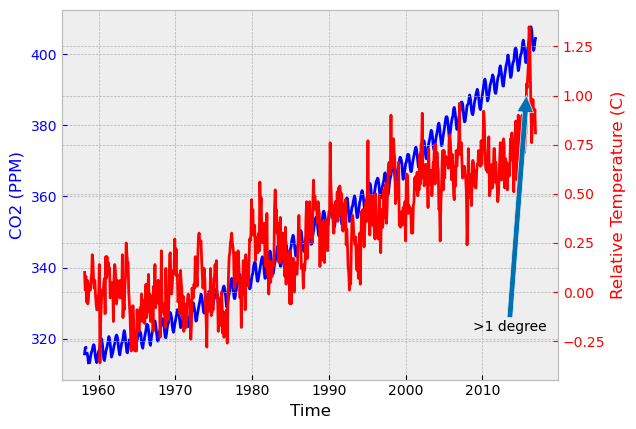

In [210]:
#annotating time series data
#using twin axes
#twin axes means having same x-axis and 2 y-axis
#using colored ticks
fig, ax = plt.subplots()
ax.plot(df.index,df["co2"], color="blue")
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (PPM)", color="blue")
ax.tick_params("y", colors="blue")
ax2 = ax.twinx()
ax2.plot(df.index,df["relative_temp"], color="red")
ax2.set_ylabel("Relative Temperature (C)", color="red")
ax2.tick_params("y", colors="red")
ax2.annotate(">1 degree",xy=(pd.Timestamp("2015-10-06"),1), xytext=(pd.Timestamp("2008-10-06"),-0.2), arrowprops={} )
plt.show()

## Quantitative Comparisons

### Bar charts

In [211]:
df = pd.read_csv("https://assets.datacamp.com/production/repositories/3634/datasets/ec663f9f509bf633d40932f65bd4cc51205689e2/medals_by_country_2016.csv", index_col=0)
df

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


C:\Users\EGYPT\AppData\Local\Temp\ipykernel_25912\3546741811.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)


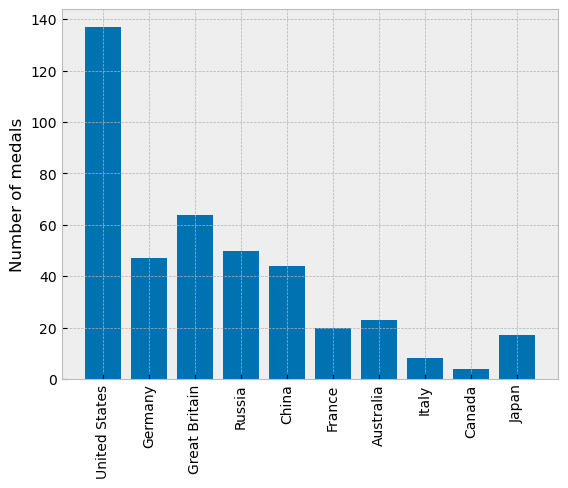

In [212]:
fig, ax = plt.subplots()
ax.bar(df.index, df["Gold"])
#rotate labels by 90 degrees to prevent overlabing
ax.set_xticklabels(df.index, rotation=90)
ax.set_ylabel("Number of medals")
plt.show()

C:\Users\EGYPT\AppData\Local\Temp\ipykernel_25912\1454251731.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)


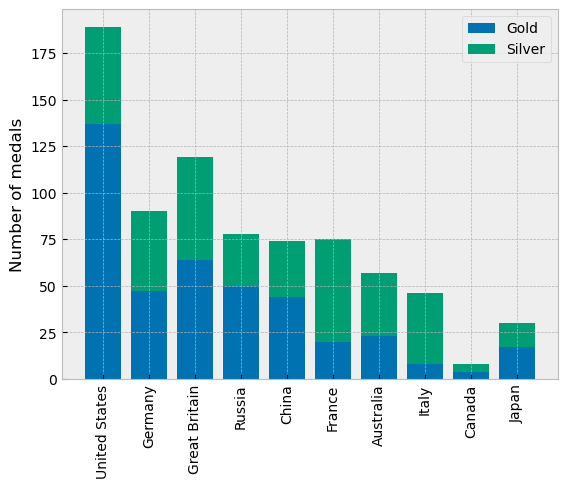

In [213]:
#stacked bar chart to create many plots over the same plot
fig, ax = plt.subplots()
ax.bar(df.index, df["Gold"], label="Gold")
ax.bar(df.index, df["Silver"], bottom=df["Gold"], label="Silver")
#rotate labels by 90 degrees to prevent overlabing
ax.set_xticklabels(df.index, rotation=90)
ax.set_ylabel("Number of medals")
ax.legend()
plt.show()

### Histograms

In [214]:
df = pd.read_csv("https://assets.datacamp.com/production/repositories/3634/datasets/67d7344085ace400d612275b87738615698127a3/summer2016.csv")

In [215]:
df

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,269511,134857,Zhu Ting,F,21.0,198.0,78.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Gold
2010,270111,135132,Bojana ivkovi,F,28.0,186.0,72.0,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Silver
2011,270281,135205,Shakhobiddin Shokirovich Zoirov,M,23.0,169.0,52.0,Uzbekistan,UZB,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Flyweight,Gold
2012,270370,135245,Milenko Zori,M,27.0,179.0,73.0,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Doubles, 1,000 metres",Silver


In [216]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team',
       'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [217]:
mens_rowing=df[df["Sport"]=="Rowing"]
mens_rowing

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
10,1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
52,6598,3691,Anne Dsane Andersen,F,23.0,183.0,86.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Coxless Pairs,Bronze
78,11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold
89,14103,7612,Carina Br,F,26.0,185.0,75.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,258859,129601,Phillipp Wende,M,31.0,199.0,90.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Quadruple Sculls,Gold
1919,260260,130259,Peter Noel Jan Wiersum,M,31.0,173.0,55.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,Bronze
1920,260338,130298,Tone Wieten,M,22.0,201.0,102.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,Bronze
1934,261547,130868,Melanie Kate Wilson,F,32.0,184.0,75.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Coxed Eights,Silver


In [218]:
mens_gym=df[df["Sport"]=="Gymnastics"]
mens_gym

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
5,796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver
6,797,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Bronze
122,18577,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
123,18579,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,261563,130874,Nile Wilson,M,20.0,166.0,60.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,Bronze
1956,264454,132340,Koji Yamamuro,M,27.0,159.0,58.0,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Gold
1978,266171,133174,You Hao,M,24.0,162.0,60.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Bronze
1986,267709,133931,Arthur Nabarrete Zanetti,M,26.0,156.0,61.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Silver


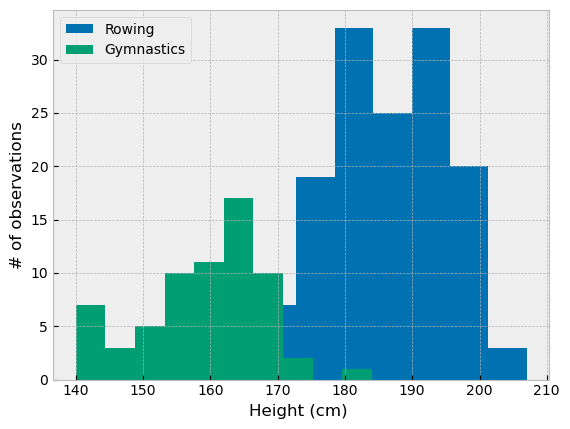

In [219]:
fig, ax = plt.subplots()
#bins can be a list [150, 160, 170, 190, 200, 210]
# if bins are a list then they show on x-axis
ax.hist(mens_rowing["Height"], label="Rowing", bins=10)
ax.hist(mens_gym["Height"], label="Gymnastics", bins=10)
ax.set_xlabel("Height (cm) ")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

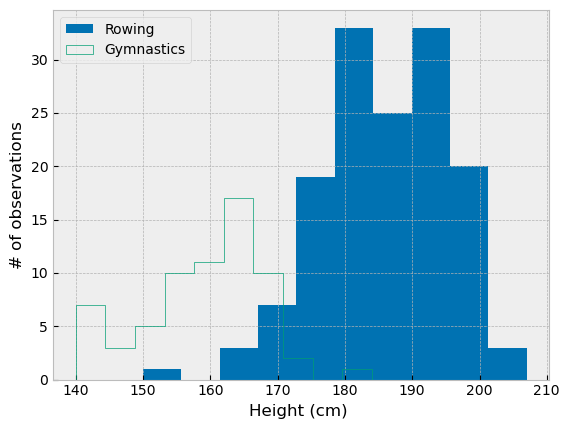

In [220]:
fig, ax = plt.subplots()
#bins can be a list [150, 160, 170, 190, 200, 210]
# if bins are a list then they show on x-axis
ax.hist(mens_rowing["Height"], label="Rowing", bins=10)
ax.hist(mens_gym["Height"], label="Gymnastics", bins=10,histtype="step")
ax.set_xlabel("Height (cm) ")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

## Statistical Plotting

### adding error bars to bar charts

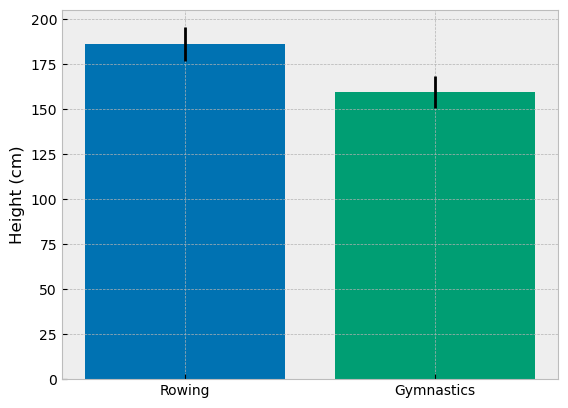

In [221]:
fig, ax = plt.subplots()
#add error bar as an argument to the bar chart
#for each call to ax.bar 1st arg is x-axis, 2nd arg is mean of height , yerr = std additional vertical marker
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr=mens_rowing["Height"].std())
ax.bar("Gymnastics", mens_gym["Height"].mean(), yerr=mens_gym["Height"].std())
ax.set_ylabel("Height (cm)")
plt.show()


can be done also for the regular plots using 
ax.errorbar()
passing the same parameters above

### Adding box plots

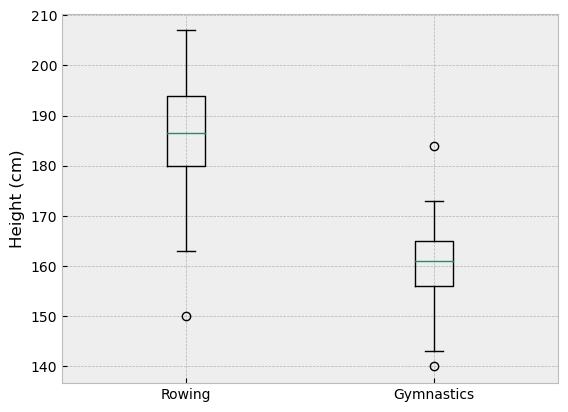

In [222]:
fig, ax = plt.subplots()
ax.boxplot([ mens_rowing["Height"], mens_gym["Height"] ])
ax.set_xticklabels(["Rowing", "Gymnastics"])
ax.set_ylabel("Height (cm)")
plt.show()
# orange line indecates the median height
#the edges of box indecates the IQR 25th to 75th
#whiskers indecates 1.5*size of IQR beyond 75th and 25th percentiles
#for gausian or normal distribution data 99% of data are within the limits of the whiskers
# dots are outliers beyond the whiskers

### Scatter Plots

In [223]:
#used in bivariate comparisons
climate_change = pd.read_csv("https://assets.datacamp.com/production/repositories/3634/datasets/411add3f8570d5adf891127fd64095020210711b/climate_change.csv", parse_dates=["date"], index_col="date")
climate_change

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06
...,...,...
2016-08-06,402.27,0.98
2016-09-06,401.05,0.87
2016-10-06,401.59,0.89


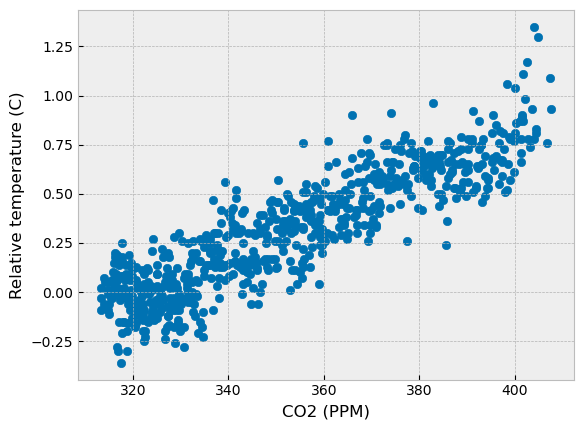

In [224]:
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (PPM)")
ax.set_ylabel("Relative temperature (C)")
plt.show()

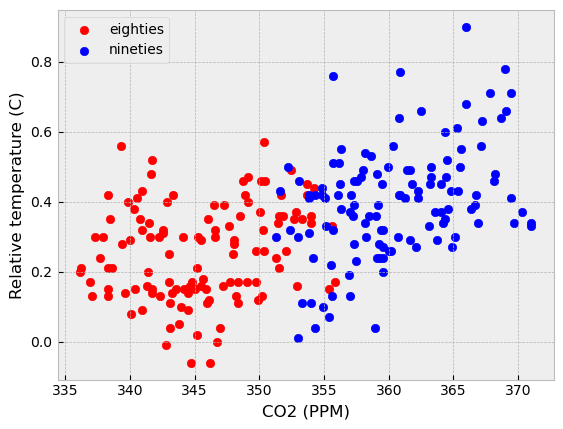

In [225]:
fig, ax = plt.subplots()
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]
ax.scatter(eighties["co2"], eighties["relative_temp"], color="red", label="eighties")
ax.scatter(nineties["co2"], nineties["relative_temp"], color="blue", label="nineties")
ax.legend()
ax.set_xlabel("CO2 (PPM)")
ax.set_ylabel("Relative temperature (C)")
plt.show()

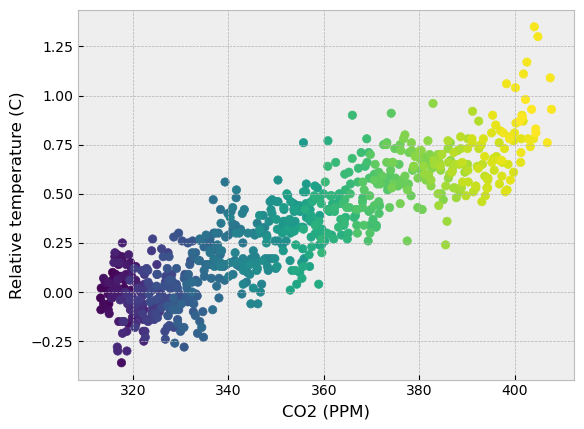

In [226]:
#encoding a third variable by color
# time is incoded in color where dark is late and light is early
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"],c=climate_change.index)
ax.set_xlabel("CO2 (PPM)")
ax.set_ylabel("Relative temperature (C)")
plt.show()

## Styling the plots

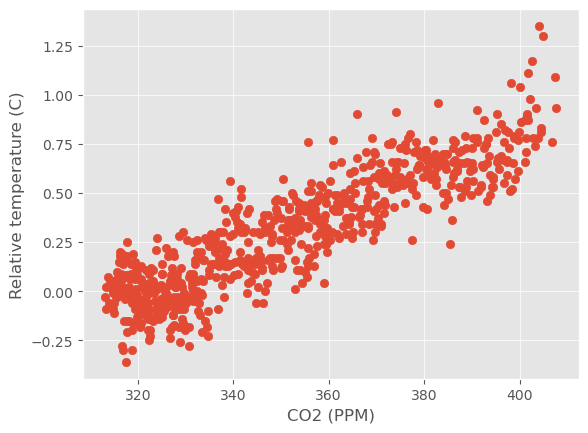

In [227]:
#changing plot styles
#use style of R-library ggplot
plt.style.use("ggplot")
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (PPM)")
ax.set_ylabel("Relative temperature (C)")
plt.show()

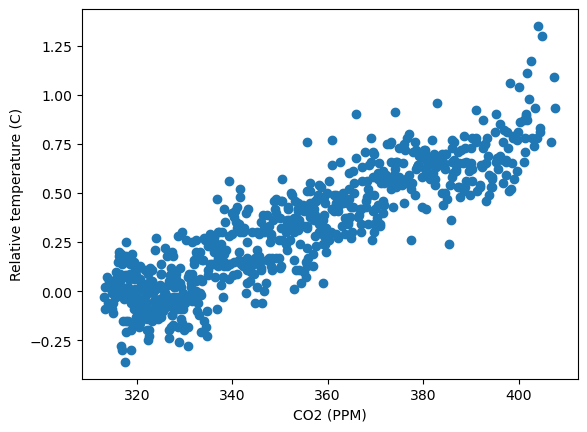

In [228]:
plt.style.use("default")
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (PPM)")
ax.set_ylabel("Relative temperature (C)")
plt.show()

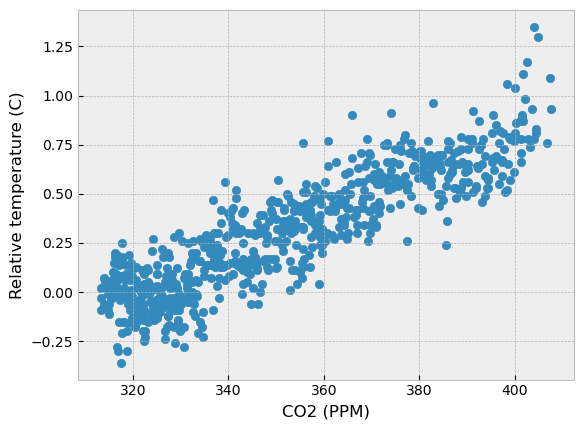

In [229]:
plt.style.use("bmh")
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (PPM)")
ax.set_ylabel("Relative temperature (C)")
plt.show()

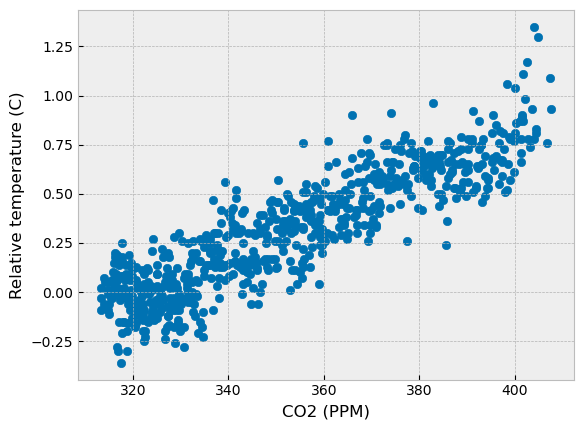

In [230]:
plt.style.use("seaborn-colorblind")
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (PPM)")
ax.set_ylabel("Relative temperature (C)")
plt.show()

In [231]:
# check docs for others

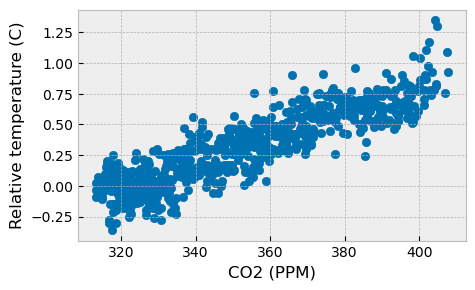

In [232]:
#saving visualizations
plt.style.use("seaborn-colorblind")
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (PPM)")
ax.set_ylabel("Relative temperature (C)")
fig.set_size_inches([5,3])
fig.savefig("scatter.png")
plt.show()

In [233]:
#formats png, jpg, specify quality=50 
#fig.savefig(x.svg) interactive
# keyword arg dpi = 300   rendering 